In [66]:
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.family'] = 'Arial'
# plt.rcParams['font.Helvetica'] = 'Helvetica'
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from scipy.interpolate import PchipInterpolator as pchip
import sys
sys.path.append('..')
from cal_func import cal_spec_extention, scaled_spectra, scaled_plot_dict, scaled_plot_species, experimental_plot

In [67]:
labels_aq = [r'1 H$_{2}$O', r'2 H$_{2}$O', r'3 H$_{2}$O', r'4 H$_{2}$O', r'5 H$_{2}$O', r'6 H$_{2}$O']
labels_Mn_aq = [r'Mn$^{2+}$', r'MnCl$^{+}$', r'MnCl$_{2}$', r'MnCl$_{3}^{+}$', 'Full']
labels_Mn = [r'Mn(H$_{2}$O)$_{6}^{2+}$', r'MnCl$^{+}$', r'MnCl$_{2}$', r'MnCl$_{3}^{+}$', 'Full']
labels_ForRep = ['1.62 M in water', '1.63 M in HCl', '8.93$\cdot$10$^{-1}$ M in water', '8.76$\cdot$10$^{-1}$ M in HCl']

functionals = ['cam', 'wb']
aq_list = ['1aq', '2aq', '3aq', '4aq', '5aq', '6aq']

percentage_low = [0.448, 0.245, 0.237, 0.0815]
percentage_high = [0.281, 0.262, 0.313, 0.144]

In [68]:
uvvis_v2_path = './uvvis_v2.CSV'
uvvis_v2 = pd.read_csv(uvvis_v2_path, sep = ';', decimal = ',')

uvvis_vacuum_path = './camb3lyp_uvvis.CSV'
uvvis_vacuum = pd.read_csv(uvvis_vacuum_path, sep = ';', decimal = ',')

uvvis_water_path = './camb3lyp_water_uvvis.CSV'
uvvis_water = pd.read_csv(uvvis_water_path, sep = ';', decimal = ',')

Experimental_path = './epsilon_fRep.csv'
experimtal = pd.read_csv(Experimental_path, index_col = 0)

In [69]:
dict_cam_low = {}
dict_cam_high = {}
df_dict_wb = {}

for func in functionals:
    for aq in aq_list:
        key = ' '.join([func, aq])
        mask = [key in i for i in uvvis_v2.keys()]
        uvvis_unscaled = uvvis_v2.loc[:, mask]
        if 'cam' in key:
            dict_cam_low[key] = scaled_spectra(uvvis_unscaled, percentage_low)
            dict_cam_high[key] = scaled_spectra(uvvis_unscaled, percentage_high)
        # if 'wb' in key:
        #     df_dict_wb[key] = scaled_spectra(uvvis_unscaled, percentage_low)

vacuum_low = scaled_spectra(uvvis_vacuum, percentage_low)
vacuum_high = scaled_spectra(uvvis_vacuum, percentage_high)

water_low = scaled_spectra(uvvis_water, percentage_low)
water_high = scaled_spectra(uvvis_water, percentage_high)

# display(dict_cam_high)

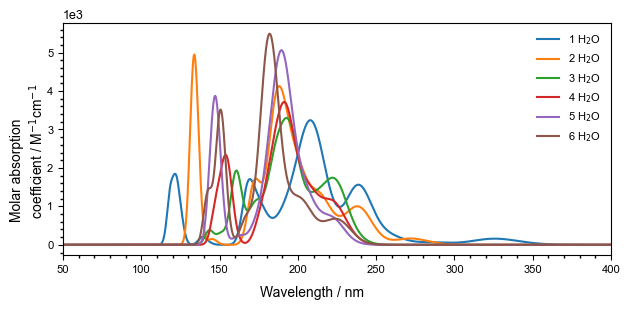

In [70]:
fig, ax = plt.subplots(1,1, figsize = (6.3, 3))

scaled_plot_dict(ax, dict_cam_low, labels_aq, (3,3), 1)

ax.set_xlim(50, 400)

fig.supxlabel('Wavelength / nm', fontsize = 10)
fig.supylabel('Molar absorption \n coefficient / M$^{-1}$cm$^{-1}$', fontsize = 10)
fig.tight_layout(pad = 0.5)
plt.savefig('scaled_cam_low.png', dpi = 150)
plt.show()

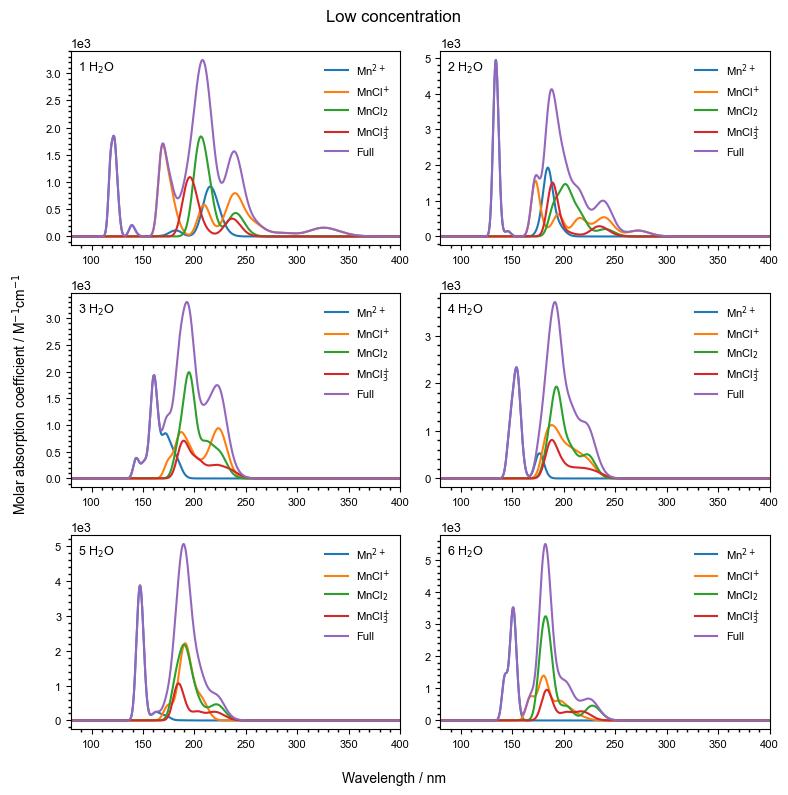

In [78]:
fig, axes = plt.subplots(3,2, figsize = (8,8))

scaled_plot_species(axes[0][0], dict_cam_low['cam 1aq'], dict_cam_low['cam 1aq'].keys()[1:6], labels_Mn_aq, (3,3), 1)
axes[0][0].set_xlim(80, 400)
scaled_plot_species(axes[0][1], dict_cam_low['cam 2aq'], dict_cam_low['cam 2aq'].keys()[1:6], labels_Mn_aq, (3,3), 1)
axes[0][1].set_xlim(80, 400)
scaled_plot_species(axes[1][0], dict_cam_low['cam 3aq'], dict_cam_low['cam 3aq'].keys()[1:6], labels_Mn_aq, (3,3), 1)
axes[1][0].set_xlim(80, 400)
scaled_plot_species(axes[1][1], dict_cam_low['cam 4aq'], dict_cam_low['cam 4aq'].keys()[1:6], labels_Mn_aq, (3,3), 1)
axes[1][1].set_xlim(80, 400)
scaled_plot_species(axes[2][0], dict_cam_low['cam 5aq'], dict_cam_low['cam 5aq'].keys()[1:6], labels_Mn_aq, (3,3), 1)
axes[2][0].set_xlim(80, 400)
scaled_plot_species(axes[2][1], dict_cam_low['cam 6aq'], dict_cam_low['cam 6aq'].keys()[1:6], labels_Mn_aq, (3,3), 1)
axes[2][1].set_xlim(80, 400)

sublabels = [r'1 H$_{2}$O', r'2 H$_{2}$O', r'3 H$_{2}$O', r'4 H$_{2}$O', r'5 H$_{2}$O', r'6 H$_{2}$O']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.02, 0.9, l, transform = ax.transAxes, fontsize = 9)

fig.supxlabel('Wavelength / nm', fontsize = 10)
fig.supylabel('Molar absorption coefficient / M$^{-1}$cm$^{-1}$', fontsize = 10)
fig.suptitle('Low concentration')

fig.tight_layout()
plt.savefig('full_scaled_cam_low.png', dpi = 150)
plt.show()

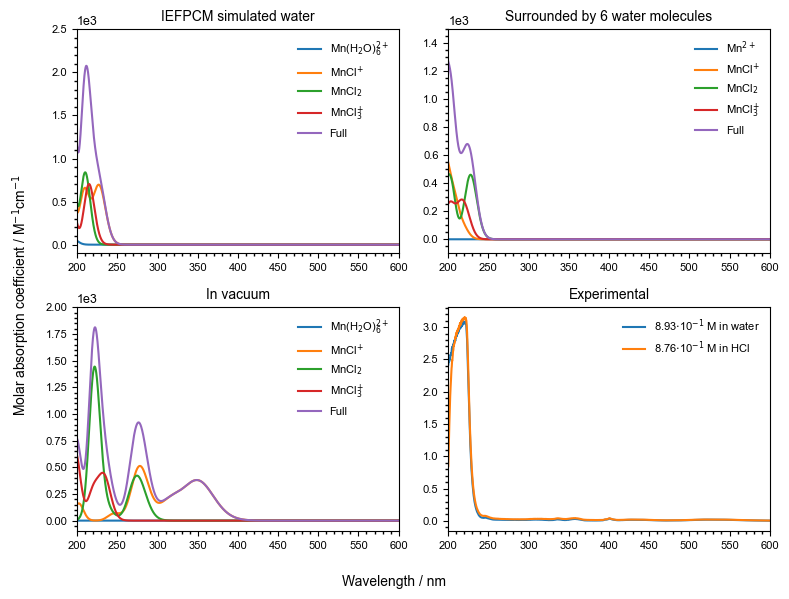

In [72]:
fig, axes = plt.subplots(2,2, figsize = (8,6))

scaled_plot_species(axes[0][0], water_low, water_low.keys()[1:6], labels_Mn, (3,3), 1)
axes[0][0].set_xlim(200, 600)
axes[0][0].set_ylim(-10**(2), 2.5*10**3)
axes[0][0].set_title('IEFPCM simulated water', fontsize = 10)
scaled_plot_species(axes[0][1], dict_cam_low['cam 6aq'], dict_cam_low['cam 6aq'].keys()[1:6], labels_Mn_aq, (3,3), 1)
axes[0][1].set_xlim(200, 600)
axes[0][1].set_ylim(-10**(2), 1.5*10**3)
axes[0][1].set_title('Surrounded by 6 water molecules', fontsize = 10)
scaled_plot_species(axes[1][0], vacuum_low, vacuum_low.keys()[1:6], labels_Mn, (3,3), 1)
axes[1][0].set_xlim(200, 600)
axes[1][0].set_ylim(-10**(2), 2*10**3)
axes[1][0].set_title('In vacuum', fontsize = 10)
experimental_plot(axes[1][1], experimtal, 's3.3', labels_ForRep[2], 1)
experimental_plot(axes[1][1], experimtal, 's4.3', labels_ForRep[3], 1)
axes[1][1].set_xlim(200, 600)
axes[1][1].set_title('Experimental', fontsize = 10)

fig.supxlabel('Wavelength / nm', fontsize = 10)
fig.supylabel('Molar absorption coefficient / M$^{-1}$cm$^{-1}$', fontsize = 10)
# fig.suptitle('Low concentration')

fig.tight_layout()
plt.savefig('low_w_ex.png', dpi = 150)
plt.show()

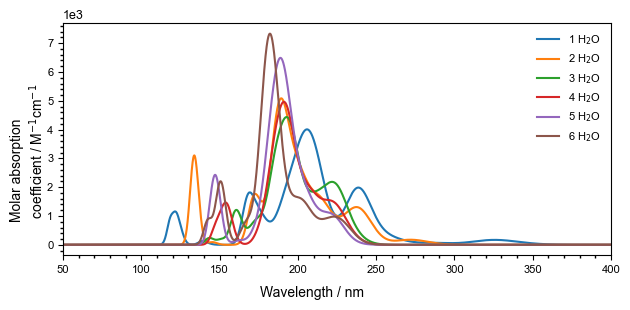

In [73]:
fig, ax = plt.subplots(1,1, figsize = (6.3, 3))

scaled_plot_dict(ax, dict_cam_high, labels_aq, (3,3), 1)

ax.set_xlim(50, 400)

fig.supxlabel('Wavelength / nm', fontsize = 10)
fig.supylabel('Molar absorption \n coefficient / M$^{-1}$cm$^{-1}$', fontsize = 10)
fig.tight_layout(pad = 0.5)
plt.savefig('scaled_cam_high.png', dpi = 150)
plt.show()

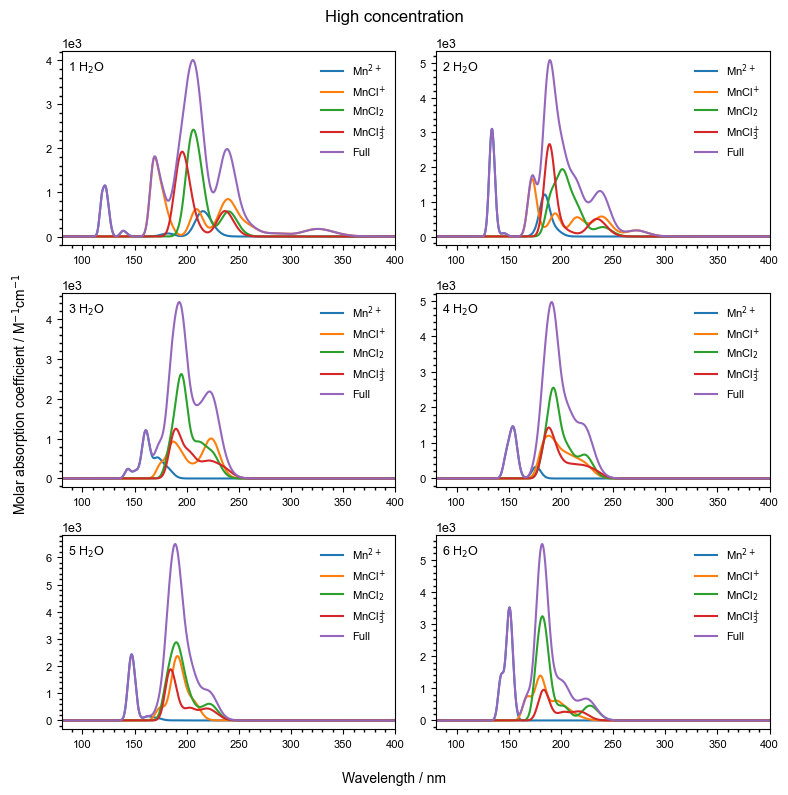

In [74]:
fig, axes = plt.subplots(3,2, figsize = (8,8))

scaled_plot_species(axes[0][0], dict_cam_high['cam 1aq'], dict_cam_high['cam 1aq'].keys()[1:6], labels_Mn_aq, (3,3), 1)
axes[0][0].set_xlim(80, 400)
scaled_plot_species(axes[0][1], dict_cam_high['cam 2aq'], dict_cam_high['cam 2aq'].keys()[1:6], labels_Mn_aq, (3,3), 1)
axes[0][1].set_xlim(80, 400)
scaled_plot_species(axes[1][0], dict_cam_high['cam 3aq'], dict_cam_high['cam 3aq'].keys()[1:6], labels_Mn_aq, (3,3), 1)
axes[1][0].set_xlim(80, 400)
scaled_plot_species(axes[1][1], dict_cam_high['cam 4aq'], dict_cam_high['cam 4aq'].keys()[1:6], labels_Mn_aq, (3,3), 1)
axes[1][1].set_xlim(80, 400)
scaled_plot_species(axes[2][0], dict_cam_high['cam 5aq'], dict_cam_high['cam 5aq'].keys()[1:6], labels_Mn_aq, (3,3), 1)
axes[2][0].set_xlim(80, 400)
scaled_plot_species(axes[2][1], dict_cam_low['cam 6aq'], dict_cam_low['cam 6aq'].keys()[1:6], labels_Mn_aq, (3,3), 1)
axes[2][1].set_xlim(80, 400)

sublabels = [r'1 H$_{2}$O', r'2 H$_{2}$O', r'3 H$_{2}$O', r'4 H$_{2}$O', r'5 H$_{2}$O', r'6 H$_{2}$O']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.02, 0.9, l, transform = ax.transAxes, fontsize = 9)

fig.supxlabel('Wavelength / nm', fontsize = 10)
fig.supylabel('Molar absorption coefficient / M$^{-1}$cm$^{-1}$', fontsize = 10)
fig.suptitle('High concentration')

fig.tight_layout()
plt.savefig('full_scaled_cam_high.png', dpi = 150)
plt.show()

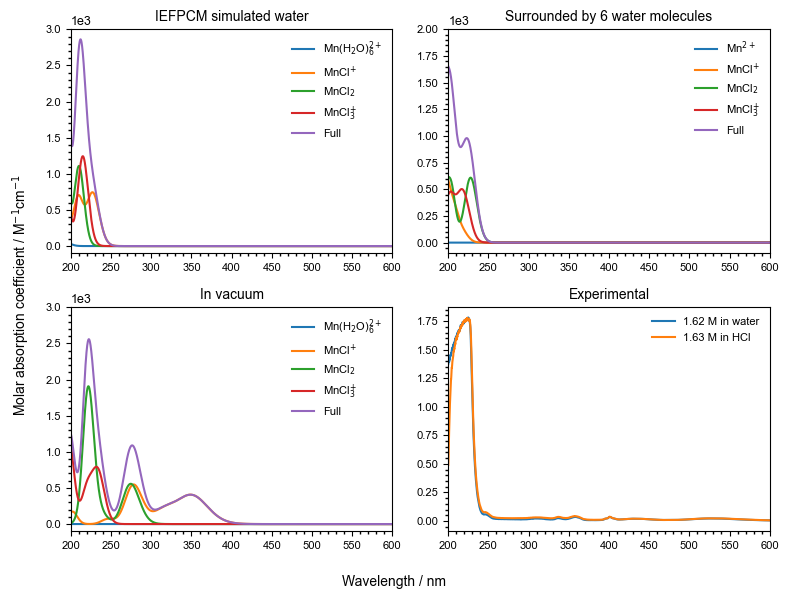

In [75]:
fig, axes = plt.subplots(2,2, figsize = (8,6))

scaled_plot_species(axes[0][0], water_high, water_high.keys()[1:6], labels_Mn, (3,3), 1)
axes[0][0].set_xlim(200, 600)
axes[0][0].set_ylim(-10**(2), 3*10**3)
axes[0][0].set_title('IEFPCM simulated water', fontsize = 10)
scaled_plot_species(axes[0][1], dict_cam_high['cam 6aq'], dict_cam_high['cam 6aq'].keys()[1:6], labels_Mn_aq, (3,3), 1)
axes[0][1].set_xlim(200, 600)
axes[0][1].set_ylim(-10**(2), 2*10**3)
axes[0][1].set_title('Surrounded by 6 water molecules', fontsize = 10)
scaled_plot_species(axes[1][0], vacuum_high, vacuum_high.keys()[1:6], labels_Mn, (3,3), 1)
axes[1][0].set_xlim(200, 600)
axes[1][0].set_ylim(-10**(2), 3*10**3)
axes[1][0].set_title('In vacuum', fontsize = 10)
experimental_plot(axes[1][1], experimtal, 's1.3', labels_ForRep[0], 1)
experimental_plot(axes[1][1], experimtal, 's2.3', labels_ForRep[1], 1)
axes[1][1].set_xlim(200, 600)
axes[1][1].set_title('Experimental', fontsize = 10)

fig.supxlabel('Wavelength / nm', fontsize = 10)
fig.supylabel('Molar absorption coefficient / M$^{-1}$cm$^{-1}$', fontsize = 10)
# fig.suptitle('High concentration')

fig.tight_layout()
plt.savefig('high_w_ex.png', dpi = 150)
plt.show()

In [76]:
def make_subplot(axes, xdataname,  ydataname, scilimit, ncols):
    ax = axes
    if '1aq' in xdataname:
        sns.lineplot(x = uvvis_v2[xdataname], y = uvvis_v2[ydataname], ax = ax, label = labels_aq[0], color = 'tab:blue')
    if '2aq' in xdataname:
        sns.lineplot(x = uvvis_v2[xdataname], y = uvvis_v2[ydataname], ax = ax, label = labels_aq[1], color = 'tab:orange')
    if '3aq' in xdataname:
        sns.lineplot(x = uvvis_v2[xdataname], y = uvvis_v2[ydataname], ax = ax, label = labels_aq[2], color = 'tab:green')
    if '4aq' in xdataname:
        sns.lineplot(x = uvvis_v2[xdataname], y = uvvis_v2[ydataname], ax = ax, label = labels_aq[3], color = 'tab:red')
    if '5aq' in xdataname:
        sns.lineplot(x = uvvis_v2[xdataname], y = uvvis_v2[ydataname], ax = ax, label = labels_aq[4], color = 'tab:purple')
    if '6aq' in xdataname:
        sns.lineplot(x = uvvis_v2[xdataname], y = uvvis_v2[ydataname], ax = ax, label = labels_aq[5], color = 'tab:brown')
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True, labelsize = 8)
    ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
    ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = scilimit)
    ax.yaxis.offsetText.set_fontsize(9)
    ax.legend(frameon = False, ncol=ncols, fontsize = 8)

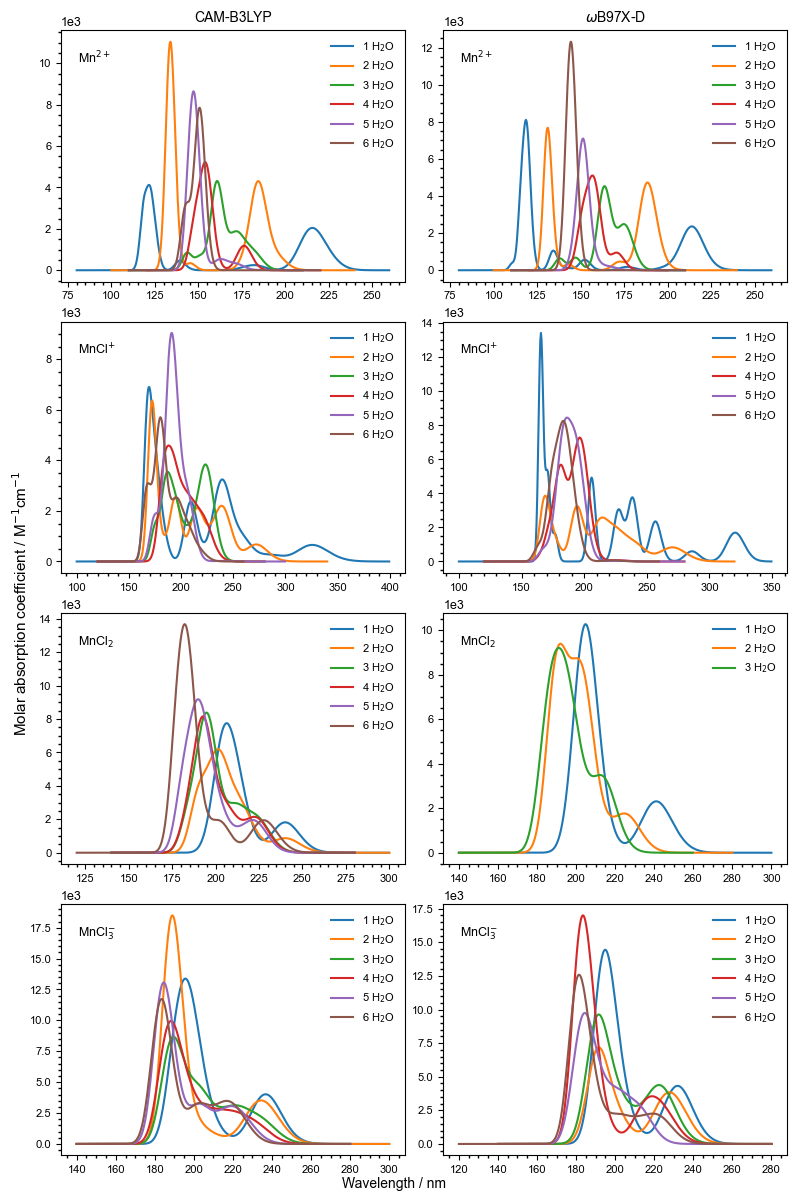

In [77]:
fig, axes = plt.subplots(4,2, figsize = (8,12))

# CAM-B3LYP Mn(II)
make_subplot(axes[0][0], 'X Mn cam 1aq', 'Y Mn cam 1aq', (3,3), 1)
make_subplot(axes[0][0], 'X Mn cam 2aq', 'Y Mn cam 2aq', (3,3), 1)
make_subplot(axes[0][0], 'X Mn cam 3aq', 'Y Mn cam 3aq', (3,3), 1)
make_subplot(axes[0][0], 'X Mn cam 4aq', 'Y Mn cam 4aq', (3,3), 1)
make_subplot(axes[0][0], 'X Mn cam 5aq', 'Y Mn cam 5aq', (3,3), 1)
make_subplot(axes[0][0], 'X Mn cam 6aq', 'Y Mn cam 6aq', (3,3), 1)
axes[0][0].set_title('CAM-B3LYP', fontsize = 10)

# wB97X-D Mn(II)
make_subplot(axes[0][1], 'X Mn wb 1aq', 'Y Mn wb 1aq', (3,3), 1)
make_subplot(axes[0][1], 'X Mn wb 2aq', 'Y Mn wb 2aq', (3,3), 1)
make_subplot(axes[0][1], 'X Mn wb 3aq', 'Y Mn wb 3aq', (3,3), 1)
make_subplot(axes[0][1], 'X Mn wb 4aq', 'Y Mn wb 4aq', (3,3), 1)
make_subplot(axes[0][1], 'X Mn wb 5aq', 'Y Mn wb 5aq', (3,3), 1)
make_subplot(axes[0][1], 'X Mn wb 6aq', 'Y Mn wb 6aq', (3,3), 1)
axes[0][1].set_title(r'$\omega$B97X-D', fontsize = 10)

# CAM-B3LYP MnCl+
make_subplot(axes[1][0], 'X Cl cam 1aq', 'Y Cl cam 1aq', (3,3), 1)
make_subplot(axes[1][0], 'X Cl cam 2aq', 'Y Cl cam 2aq', (3,3), 1)
make_subplot(axes[1][0], 'X Cl cam 3aq', 'Y Cl cam 3aq', (3,3), 1)
make_subplot(axes[1][0], 'X Cl cam 4aq', 'Y Cl cam 4aq', (3,3), 1)
make_subplot(axes[1][0], 'X Cl cam 5aq', 'Y Cl cam 5aq', (3,3), 1)
make_subplot(axes[1][0], 'X Cl cam 6aq', 'Y Cl cam 6aq', (3,3), 1)

# wB97X-D MnCl+
make_subplot(axes[1][1], 'X Cl wb 1aq', 'Y Cl wb 1aq', (3,3), 1)
make_subplot(axes[1][1], 'X Cl wb 2aq', 'Y Cl wb 2aq', (3,3), 1)
# make_subplot(axes[1][1], 'X Cl wb 3aq', 'Y Cl wb 3aq', (3,3), 1)
make_subplot(axes[1][1], 'X Cl wb 4aq', 'Y Cl wb 4aq', (3,3), 1)
make_subplot(axes[1][1], 'X Cl wb 5aq', 'Y Cl wb 5aq', (3,3), 1)
make_subplot(axes[1][1], 'X Cl wb 6aq', 'Y Cl wb 6aq', (3,3), 1)

# CAM-B3LYP MnCl2
make_subplot(axes[2][0], 'X Cl2 cam 1aq', 'Y Cl2 cam 1aq', (3,3), 1)
make_subplot(axes[2][0], 'X Cl2 cam 2aq', 'Y Cl2 cam 2aq', (3,3), 1)
make_subplot(axes[2][0], 'X Cl2 cam 3aq', 'Y Cl2 cam 3aq', (3,3), 1)
make_subplot(axes[2][0], 'X Cl2 cam 4aq', 'Y Cl2 cam 4aq', (3,3), 1)
make_subplot(axes[2][0], 'X Cl2 cam 5aq', 'Y Cl2 cam 5aq', (3,3), 1)
make_subplot(axes[2][0], 'X Cl2 cam 6aq', 'Y Cl2 cam 6aq', (3,3), 1)

# wB97X-D MnCl2
make_subplot(axes[2][1], 'X Cl2 wb 1aq', 'Y Cl2 wb 1aq', (3,3), 1)
make_subplot(axes[2][1], 'X Cl2 wb 2aq', 'Y Cl2 wb 2aq', (3,3), 1)
make_subplot(axes[2][1], 'X Cl2 wb 3aq', 'Y Cl2 wb 3aq', (3,3), 1)
# make_subplot(axes[2][1], 'X Cl2 wb 4aq', 'Y Cl2 wb 4aq', (3,3), 1)
# make_subplot(axes[2][1], 'X Cl2 wb 5aq', 'Y Cl2 wb 5aq', (3,3), 1)
# make_subplot(axes[2][1], 'X Cl2 wb 6aq', 'Y Cl2 wb 6aq', (3,3), 1)

# CAM-B3LYP MnCl3-
make_subplot(axes[3][0], 'X Cl3 cam 1aq', 'Y Cl3 cam 1aq', (3,3), 1)
make_subplot(axes[3][0], 'X Cl3 cam 2aq', 'Y Cl3 cam 2aq', (3,3), 1)
make_subplot(axes[3][0], 'X Cl3 cam 3aq', 'Y Cl3 cam 3aq', (3,3), 1)
make_subplot(axes[3][0], 'X Cl3 cam 4aq', 'Y Cl3 cam 4aq', (3,3), 1)
make_subplot(axes[3][0], 'X Cl3 cam 5aq', 'Y Cl3 cam 5aq', (3,3), 1)
make_subplot(axes[3][0], 'X Cl3 cam 6aq', 'Y Cl3 cam 6aq', (3,3), 1)

# wB97X-D MnCl3-
make_subplot(axes[3][1], 'X Cl3 wb 1aq', 'Y Cl3 wb 1aq', (3,3), 1)
make_subplot(axes[3][1], 'X Cl3 wb 2aq', 'Y Cl3 wb 2aq', (3,3), 1)
make_subplot(axes[3][1], 'X Cl3 wb 3aq', 'Y Cl3 wb 3aq', (3,3), 1)
make_subplot(axes[3][1], 'X Cl3 wb 4aq', 'Y Cl3 wb 4aq', (3,3), 1)
make_subplot(axes[3][1], 'X Cl3 wb 5aq', 'Y Cl3 wb 5aq', (3,3), 1)
make_subplot(axes[3][1], 'X Cl3 wb 6aq', 'Y Cl3 wb 6aq', (3,3), 1)

sublabels = ['Mn$^{2+}$', 'Mn$^{2+}$', 'MnCl$^{+}$', 'MnCl$^{+}$', 'MnCl$_{2}$', 'MnCl$_{2}$', 
             'MnCl$_{3}^{-}$', 'MnCl$_{3}^{-}$']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.05, 0.87, l, transform = ax.transAxes, fontsize = 9)

fig.supxlabel('Wavelength / nm', fontsize = 10)
fig.supylabel('Molar absorption coefficient / M$^{-1}$cm$^{-1}$', fontsize = 11)
fig.tight_layout(pad=0.5)
plt.savefig('water_sim_v2.png', dpi = 150)
plt.show()